# Final Project (Group 9)

Lily Zheng, Zeeshan Raza, Harshit Aggarwal, Kyle Lyon, Charlotte Lu, Tivon Johnson

## Acquiring the Data

Use the cases.csv provided to download the cases and deaths recorded.

In [ ]:
!wget -i cases.csv -p '/home/ubuntu/notebooks/Final/'

In [ ]:
import os
import glob

os.chdir ('/home/ubuntu/notebooks/Final/raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us')

!csvstack *.csv > cases_and_deaths.csv

In [ ]:
!mv cases_and_deaths.csv /home/ubuntu/notebooks/Final/cases_and_deaths.csv

In [ ]:
os.chdir ('/home/ubuntu/notebooks/Final/')
!rm -r 'raw.githubusercontent.com'

Grab the Vaccine data file

In [ ]:
!wget https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/us_data/time_series/vaccine_data_us_timeline.csv

Grab the People Vaccinated data file and the testing data file

In [ ]:
!wget https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/us_data/time_series/people_vaccinated_us_timeline.csv
!wget https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/testing_data/time_series_covid19_US.csv

Grab the file containing the population of each state

population data source: https://data.census.gov/cedsci/table?y=2020&d=DEC%20Redistricting%20Data%20%28PL%2094-171%29&tid=DECENNIALPL2020.P1&hidePreview=true&tp=false

## Exploratory Data Analysis

In [200]:
!head -n 10 time_series_covid19_US.csv | csvstat

  1. "date"

	Type of data:          Date
	Contains null values:  False
	Unique values:         9
	Smallest value:        2020-03-06
	Largest value:         2020-03-14
	Most common values:    2020-03-06 (1x)
	                       2020-03-07 (1x)
	                       2020-03-08 (1x)
	                       2020-03-09 (1x)
	                       2020-03-10 (1x)

  2. "state"

	Type of data:          Text
	Contains null values:  False
	Unique values:         1
	Longest value:         2 characters
	Most common values:    AK (9x)

  3. "cases_conf_probable"

	Type of data:          Boolean
	Contains null values:  True (excluded from calculations)
	Unique values:         1
	Most common values:    None (9x)

  4. "cases_confirmed"

	Type of data:          Boolean
	Contains null values:  True (excluded from calculations)
	Unique values:         1
	Most common values:    None (9x)

  5. "cases_probable"

	Type of data:          Boolean
	Contains null values:  True (excluded from calculati

In [201]:
!head -n 10 cases_and_deaths.csv | csvstat

  1. "Province_State"

	Type of data:          Text
	Contains null values:  False
	Unique values:         9
	Longest value:         14 characters
	Most common values:    Alabama (1x)
	                       Alaska (1x)
	                       American Samoa (1x)
	                       Arizona (1x)
	                       Arkansas (1x)

  2. "Country_Region"

	Type of data:          Text
	Contains null values:  False
	Unique values:         1
	Longest value:         2 characters
	Most common values:    US (9x)

  3. "Last_Update"

	Type of data:          DateTime
	Contains null values:  False
	Unique values:         1
	Smallest value:        2021-01-02 05:30:44
	Largest value:         2021-01-02 05:30:44
	Most common values:    2021-01-02 05:30:44 (9x)

  4. "Lat"

	Type of data:          Number
	Contains null values:  False
	Unique values:         9
	Smallest value:        -14.271
	Largest value:         61.3707
	Sum:                   304.2097
	Mean:                  33.801078
	Media

In [202]:
!head -n 10 people_vaccinated_us_timeline.csv | csvstat

  1. "FIPS"

	Type of data:          Boolean
	Contains null values:  False
	Unique values:         1
	Most common values:    True (9x)

  2. "Province_State"

	Type of data:          Text
	Contains null values:  False
	Unique values:         1
	Longest value:         7 characters
	Most common values:    Alabama (9x)

  3. "Country_Region"

	Type of data:          Text
	Contains null values:  False
	Unique values:         1
	Longest value:         2 characters
	Most common values:    US (9x)

  4. "Date"

	Type of data:          Date
	Contains null values:  False
	Unique values:         9
	Smallest value:        2020-12-10
	Largest value:         2020-12-18
	Most common values:    2020-12-10 (1x)
	                       2020-12-11 (1x)
	                       2020-12-12 (1x)
	                       2020-12-13 (1x)
	                       2020-12-14 (1x)

  5. "Lat"

	Type of data:          Number
	Contains null values:  False
	Unique values:         1
	Smallest value:        32.3182
	La

In [203]:
!head -n 10 vaccine_data_us_timeline.csv | csvstat

  1. "Province_State"

	Type of data:          Text
	Contains null values:  False
	Unique values:         1
	Longest value:         7 characters
	Most common values:    Alabama (9x)

  2. "Date"

	Type of data:          Date
	Contains null values:  False
	Unique values:         3
	Smallest value:        2020-12-10
	Largest value:         2020-12-12
	Most common values:    2020-12-10 (3x)
	                       2020-12-11 (3x)
	                       2020-12-12 (3x)

  3. "Vaccine_Type"

	Type of data:          Text
	Contains null values:  False
	Unique values:         3
	Longest value:         7 characters
	Most common values:    All (3x)
	                       Moderna (3x)
	                       Pfizer (3x)

  4. "FIPS"

	Type of data:          Boolean
	Contains null values:  False
	Unique values:         1
	Most common values:    True (9x)

  5. "Country_Region"

	Type of data:          Text
	Contains null values:  False
	Unique values:         1
	Longest value:         2 characte

## Loading, Cleaning and Wrangling the Data

In [204]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [205]:
!dropdb -U student covid

In [206]:
!createdb -U student covid

In [207]:
%sql postgresql://student@/week13

### Create the table containing cases and deaths data

In [208]:
%%sql
DROP TABLE IF EXISTS cases CASCADE;

CREATE TABLE cases (
 Province_State varchar(1000) null,
 Country_Region varchar null,
 Last_Update timestamp null ,
 Lat float null,
 Long_ float null,
 Confirmed float null,
 Deaths float null,
 Recovered float null,
 Active float null ,
 FIPS float null,
 Incident_Rate float null,
 Total_Test_Results float null,
 People_Hospitalized float null ,
 Case_Fatality_Ratio float  null,
 UID float not null,
 ISO3 varchar(3)  null,
 Testing_Rate float null ,
 Hospitalization_Rate float null
)

 * postgresql://student@/week13
Done.
Done.


[]

In [209]:
%%sql
COPY cases FROM '/home/ubuntu/notebooks/Final/cases_and_deaths.csv'
CSV
HEADER;

 * postgresql://student@/week13
34702 rows affected.


[]

In [210]:
%%sql
select distinct province_state from cases

 * postgresql://student@/week13
59 rows affected.


province_state
Virgin Islands
Nevada
West Virginia
South Carolina
New Mexico
Arkansas
South Dakota
American Samoa
Washington
Kentucky


In province state there are some records marked 'recovered' which is incorrect. We will remove these records.

In [211]:
%%sql
select distinct Last_Update from cases

 * postgresql://student@/week13
769 rows affected.


last_update
2020-10-31 04:30:34
2021-04-12 04:30:34
2020-09-10 04:30:24
2020-06-30 04:34:02
2021-03-25 08:31:00
2021-08-24 04:31:24
2021-07-06 04:30:55
2021-04-23 07:30:57
2021-03-09 05:30:55
2021-11-28 04:32:14


In the last_update table there are some values with none as last update, we will remove these records also

In [212]:
%%sql
DELETE from cases where province_state='Recovered'
or last_update is null

 * postgresql://student@/week13
28 rows affected.


[]

### Create the table people_vaccinated 

In [213]:
%%sql
DROP TABLE IF EXISTS people_vaccinated CASCADE;

CREATE TABLE people_vaccinated (
FIPS int null,
provinceP_state varchar(30) not null,
country_region varchar(2) not null,
Date timestamp not null,
Lat float null,
Long_ float null,
Combined_key varchar(34) not null,
Fully_vaccinated int null,
partially_vaccinated int null 
)

 * postgresql://student@/week13
Done.
Done.


[]

In [214]:
%%sql
COPY people_vaccinated FROM '/home/ubuntu/notebooks/Final/people_vaccinated_us_timeline.csv'
CSV
HEADER;

 * postgresql://student@/week13
22212 rows affected.


[]

In [215]:
%%sql
select * from people_vaccinated
limit 10

 * postgresql://student@/week13
10 rows affected.


fips,provincep_state,country_region,date,lat,long_,combined_key,fully_vaccinated,partially_vaccinated
1,Alabama,US,2020-12-10 00:00:00,32.3182,-86.9023,"Alabama, US",None,None
1,Alabama,US,2020-12-11 00:00:00,32.3182,-86.9023,"Alabama, US",None,None
1,Alabama,US,2020-12-12 00:00:00,32.3182,-86.9023,"Alabama, US",None,None
1,Alabama,US,2020-12-13 00:00:00,32.3182,-86.9023,"Alabama, US",None,None
1,Alabama,US,2020-12-14 00:00:00,32.3182,-86.9023,"Alabama, US",None,None
1,Alabama,US,2020-12-15 00:00:00,32.3182,-86.9023,"Alabama, US",None,None
1,Alabama,US,2020-12-16 00:00:00,32.3182,-86.9023,"Alabama, US",None,None
1,Alabama,US,2020-12-17 00:00:00,32.3182,-86.9023,"Alabama, US",None,None
1,Alabama,US,2020-12-18 00:00:00,32.3182,-86.9023,"Alabama, US",None,None
1,Alabama,US,2020-12-19 00:00:00,32.3182,-86.9023,"Alabama, US",None,None


### Create the table Vaccine  

In [216]:
%%sql
DROP TABLE IF EXISTS vaccine CASCADE;

CREATE TABLE vaccine (
 Province_state VARCHAR(64) NOT NULL,
 date TIMESTAMP NOT NULL,
 vaccine_type VARCHAR(64) NOT NULL,
 fips INTEGER NULL,
 country_region VARCHAR(3) NOT NULL,
 lat FLOAT NULL,
 long FLOAT NULL,
 doses_alloc INTEGER NULL,
 doses_shipped INTEGER NULL,
 doses_admin INTEGER NULL,
 stage_one_doses INTEGER NULL,
 stage_two_doses INTEGER NULL,
 combined_key VARCHAR(64) NULL
)

 * postgresql://student@/week13
Done.
Done.


[]

In [217]:
%%sql
COPY vaccine FROM '/home/ubuntu/notebooks/Final/vaccine_data_us_timeline.csv'
CSV
HEADER;

 * postgresql://student@/week13
121006 rows affected.


[]

In [218]:
%%sql
select * from vaccine
limit 10

 * postgresql://student@/week13
10 rows affected.


province_state,date,vaccine_type,fips,country_region,lat,long,doses_alloc,doses_shipped,doses_admin,stage_one_doses,stage_two_doses,combined_key
Alabama,2020-12-10 00:00:00,All,1,US,32.3182,-86.9023,None,None,None,None,None,"Alabama, US"
Alabama,2020-12-10 00:00:00,Moderna,1,US,32.3182,-86.9023,None,None,None,None,None,"Alabama, US"
Alabama,2020-12-10 00:00:00,Pfizer,1,US,32.3182,-86.9023,None,None,None,None,None,"Alabama, US"
Alabama,2020-12-11 00:00:00,All,1,US,32.3182,-86.9023,None,None,None,None,None,"Alabama, US"
Alabama,2020-12-11 00:00:00,Moderna,1,US,32.3182,-86.9023,None,None,None,None,None,"Alabama, US"
Alabama,2020-12-11 00:00:00,Pfizer,1,US,32.3182,-86.9023,None,None,None,None,None,"Alabama, US"
Alabama,2020-12-12 00:00:00,All,1,US,32.3182,-86.9023,None,None,None,None,None,"Alabama, US"
Alabama,2020-12-12 00:00:00,Moderna,1,US,32.3182,-86.9023,None,None,None,None,None,"Alabama, US"
Alabama,2020-12-12 00:00:00,Pfizer,1,US,32.3182,-86.9023,None,None,None,None,None,"Alabama, US"
Alabama,2020-12-13 00:00:00,All,1,US,32.3182,-86.9023,None,None,None,None,None,"Alabama, US"


In [219]:
%%sql
select distinct vaccine_type from vaccine

 * postgresql://student@/week13
7 rows affected.


vaccine_type
Pfizer
Unknown
Janssen
unknown
All
Unassigned
Moderna


Some records regarding vaccine_type are unknown, we can remove these records as they will not help with our analysis. We can further clean data by removing unassigned values.

In [220]:
%%sql
DELETE from vaccine where lower(vaccine_type)='unknown' or lower(vaccine_type)='unassigned'

 * postgresql://student@/week13
37963 rows affected.


[]

### Create tests table

In [221]:
%%sql
DROP TABLE IF EXISTS tests;
CREATE TABLE tests (
    date TIMESTAMP NOT NULL,
    state VARCHAR(3) NOT NULL, 
    cases_conf_probable INTEGER NULL,  
    cases_confirmed INTEGER NULL,
    cases_probable INTEGER NULL,  
    tests_viral_positive INTEGER NULL,
    tests_viral_negative INTEGER NULL, 
    tests_viral_total INTEGER NULL, 
    tests_antigen_positive INTEGER NULL,
    tests_antigen_total INTEGER NULL,
    people_viral_positive INTEGER NULL,
    people_viral_total INTEGER NULL,
    people_antigen_positive INTEGER NULL,
    people_antigen_total INTEGER NULL,
    encounters_viral_total INTEGER NULL,
    tests_combined_total INTEGER NULL   
)

 * postgresql://student@/week13
Done.
Done.


[]

In [222]:
%%sql
COPY tests FROM '/home/ubuntu/notebooks/Final/time_series_covid19_US.csv'
CSV
HEADER;

 * postgresql://student@/week13
36292 rows affected.


[]

In [223]:
%%sql
select * from tests
limit 10

 * postgresql://student@/week13
10 rows affected.


date,state,cases_conf_probable,cases_confirmed,cases_probable,tests_viral_positive,tests_viral_negative,tests_viral_total,tests_antigen_positive,tests_antigen_total,people_viral_positive,people_viral_total,people_antigen_positive,people_antigen_total,encounters_viral_total,tests_combined_total
2020-03-06 00:00:00,AK,None,None,None,None,None,8,None,None,None,None,None,None,None,8
2020-03-07 00:00:00,AK,None,None,None,None,None,12,None,None,None,None,None,None,None,12
2020-03-08 00:00:00,AK,None,None,None,None,None,14,None,None,None,None,None,None,None,14
2020-03-09 00:00:00,AK,None,None,None,None,None,23,None,None,None,None,None,None,None,23
2020-03-10 00:00:00,AK,None,None,None,None,None,23,None,None,None,None,None,None,None,23
2020-03-11 00:00:00,AK,None,None,None,None,None,46,None,None,None,None,None,None,None,46
2020-03-12 00:00:00,AK,None,None,None,None,None,46,None,None,None,None,None,None,None,46
2020-03-13 00:00:00,AK,None,None,None,None,None,60,None,None,None,None,None,None,None,60
2020-03-14 00:00:00,AK,None,None,None,None,None,144,None,None,None,None,None,None,None,144
2020-03-15 00:00:00,AK,None,None,None,None,None,144,None,None,None,None,None,None,None,144


State values in tests table are abbreviations of states whereas in other tables there are full names of states. So, we have to match them to make the dimensional model. We will create a new column named province_state containing these.

In [224]:
%%sql
ALTER TABLE tests
ADD COLUMN province_state Varchar (30)

 * postgresql://student@/week13
Done.


[]

In [225]:
%%sql
Update tests
Set province_state=CASE
WHEN state = 'AK' THEN 'Alaska'
WHEN state = 'AL' THEN  'Alabama' 
WHEN state = 'AZ' THEN  'Arizona' 
WHEN state = 'AR' THEN  'Arkansas' 
WHEN state = 'CA' THEN  'California' 
WHEN state = 'CT' THEN  'Connecticut' 
WHEN state = 'CO' THEN  'Colorado' 
WHEN state = 'DC' THEN  'District of Columbia' 
WHEN state = 'DE' THEN  'Celaware'
WHEN state = 'FL' THEN  'Florida' 
WHEN state = 'GA' THEN  'Georgia' 
WHEN state = 'HI' THEN  'Hawaii' 
WHEN state = 'IA' THEN  'Iowa' 
WHEN state = 'ID' THEN  'Idaho' 
WHEN state = 'IL' THEN  'Illinois' 
WHEN state = 'IN' THEN  'Indiana' 
WHEN state = 'KS' THEN  'Kansas' 
WHEN state = 'KY' THEN  'Kentucky' 
WHEN state = 'LA' THEN  'Louisiana' 
WHEN state = 'MD' THEN  'Maryland' 
WHEN state = 'ME' THEN  'Maine' 
WHEN state = 'MS' THEN  'Mississippi' 
WHEN state = 'MN' THEN  'Minnesota' 
WHEN state = 'MT' THEN  'Montana' 
WHEN state = 'MO' THEN  'Missouri' 
WHEN state = 'MI' THEN  'Michigan' 
WHEN state = 'MA' THEN  'Massachusetts' 
WHEN state = 'NC' THEN  'North Carolina' 
WHEN state = 'ND' THEN  'North Dakota' 
WHEN state = 'NH' THEN  'New Hampshire' 
WHEN state = 'NJ' THEN  'New Jersey' 
WHEN state = 'NM' THEN  'New Mexico' 
WHEN state = 'NV' THEN  'Nevada' 
WHEN state = 'NY' THEN  'New York' 
WHEN state = 'NE' THEN  'Nebraska' 
WHEN state = 'OH' THEN  'Ohio' 
WHEN state = 'OK' THEN  'Oklahoma' 
WHEN state = 'OR' THEN  'Oregon' 
WHEN state = 'PA' THEN  'Pennsylvania' 
WHEN state = 'RI' THEN  'Rhode Island' 
WHEN state = 'SC' THEN  'South Carolina' 
WHEN state = 'SD' THEN  'South Dakota'
WHEN state = 'TN' THEN  'Tennessee' 
WHEN state = 'TX' THEN  'Texas' 
WHEN state = 'UT' THEN  'Utah' 
WHEN state = 'VT' THEN  'Vermont' 
WHEN state = 'WA' THEN  'Washington' 
WHEN state = 'WI' THEN  'Wisconsin' 
WHEN state = 'WV' THEN  'West Virginia' 
WHEN state = 'WY' THEN  'Wyoming' 
WHEN state = 'VA' THEN  'Virginia'
WHEN state = 'AS' THEN  'American Samoa'
WHEN state = 'GU' THEN  'Guam'
WHEN state = 'MP' THEN  'Northern Mariana Islands'
WHEN state = 'MH' THEN  'Marshall Islands'
WHEN state = 'FM' THEN  'Federated States of Micronesia'
WHEN state = 'PW' THEN  'Palau'
WHEN state = 'PR' THEN  'Puerto Rico'
WHEN state = 'VI' THEN  'Virgin Islands'
end

 * postgresql://student@/week13
36292 rows affected.


[]

In [226]:
%%sql
select distinct state, province_state
from tests
limit 5

 * postgresql://student@/week13
5 rows affected.


state,province_state
PA,Pennsylvania
MP,Northern Mariana Islands
OH,Ohio
TN,Tennessee
MS,Mississippi


### Create US population table

In [227]:
%%sql
DROP TABLE IF EXISTS USpopulation;

CREATE TABLE USpopulation (
    State VARCHAR(64) NOT NULL,
    Population NUMERIC NULL    
)

 * postgresql://student@/week13
Done.
Done.


[]

In [228]:
%%sql
COPY USpopulation FROM '/home/ubuntu/notebooks/Final/DECENNIALPL2020.P1-2021-12-05T014429.csv'
CSV
HEADER;

 * postgresql://student@/week13
52 rows affected.


[]

## Creating the dimensional tables

### Create dimension table place

In [229]:
%%sql
DROP TABLE IF EXISTS place;

CREATE TABLE place (
    key SERIAL PRIMARY KEY,
    state VARCHAR(64)
);

 * postgresql://student@/week13
Done.
Done.


[]

In [230]:
%%sql
INSERT INTO place (state)
select distinct province_state as state
from cases
union
select distinct province_state as state
from vaccine
union
select distinct provincep_state as state
from people_vaccinated
union
select distinct province_state as state
from tests

 * postgresql://student@/week13
68 rows affected.


[]

In [231]:
%%sql
ALTER TABLE cases
ADD COLUMN state_key INTEGER,
ADD CONSTRAINT fk_state
    FOREIGN KEY (state_key)
    REFERENCES place (key);

 * postgresql://student@/week13
Done.


[]

In [232]:
%%sql 
select * from cases
limit 1

 * postgresql://student@/week13
1 rows affected.


province_state,country_region,last_update,lat,long_,confirmed,deaths,recovered,active,fips,incident_rate,total_test_results,people_hospitalized,case_fatality_ratio,uid,iso3,testing_rate,hospitalization_rate,state_key
Alabama,US,2021-01-02 05:30:44,32.3182,-86.9023,365747.0,4872.0,202137.0,158738.0,1.0,7459.375895463867,3275341.0,None,1.3320683423240656,84000001.0,USA,66800.27369964625,None,None


In [233]:
%%sql
UPDATE cases
SET state_key = place.key
FROM place
WHERE cases.province_state=place.state;

 * postgresql://student@/week13
34674 rows affected.


[]

In [234]:
%%sql
alter table cases drop column province_state, drop country_region, drop lat, drop long_

 * postgresql://student@/week13
Done.


[]

In [235]:
%%sql
select * from cases 
limit 5

 * postgresql://student@/week13
5 rows affected.


last_update,confirmed,deaths,recovered,active,fips,incident_rate,total_test_results,people_hospitalized,case_fatality_ratio,uid,iso3,testing_rate,hospitalization_rate,state_key
2021-01-29 05:30:28,49.0,0.0,None,49.0,88888.0,None,None,None,0.0,84088888.0,USA,None,None,14
2021-02-17 05:30:30,49.0,0.0,None,49.0,88888.0,None,None,None,0.0,84088888.0,USA,None,None,14
2020-04-12 23:18:15,1970.0,96.0,865.0,1874.0,40.0,53.85995428,22760.0,446.0,4.873096447,84000040.0,USA,622.2601824,22.63959391,61
2020-04-12 23:18:15,1527.0,52.0,None,1475.0,41.0,38.1076067,29758.0,359.0,3.405370007,84000041.0,USA,742.6366471,23.51015062,55
2021-04-13 04:30:56,89229.0,1257.0,None,None,33.0,6562.350381809076,1733889.0,None,1.408734828362976,84000033.0,USA,127518.93600919607,None,44


In [236]:
%%sql
ALTER TABLE vaccine
ADD COLUMN state_key INTEGER,
ADD CONSTRAINT fk_state
    FOREIGN KEY (state_key)
    REFERENCES place (key);

 * postgresql://student@/week13
Done.


[]

In [237]:
%%sql
UPDATE vaccine
SET state_key = place.key
FROM place
WHERE vaccine.province_state=place.state;

 * postgresql://student@/week13
83043 rows affected.


[]

In [238]:
%%sql
alter table vaccine drop column province_state, drop country_region, drop lat, drop long, drop fips, drop combined_key

 * postgresql://student@/week13
Done.


[]

In [239]:
%%sql
select * from vaccine 
limit 5

 * postgresql://student@/week13
5 rows affected.


date,vaccine_type,doses_alloc,doses_shipped,doses_admin,stage_one_doses,stage_two_doses,state_key
2020-12-10 00:00:00,All,None,None,None,None,None,35
2020-12-10 00:00:00,Moderna,None,None,None,None,None,35
2020-12-10 00:00:00,Pfizer,None,None,None,None,None,35
2020-12-11 00:00:00,All,None,None,None,None,None,35
2020-12-11 00:00:00,Moderna,None,None,None,None,None,35


In [240]:
%%sql
ALTER TABLE people_vaccinated
ADD COLUMN state_key INTEGER,
ADD CONSTRAINT fk_state
    FOREIGN KEY (state_key)
    REFERENCES place (key);

 * postgresql://student@/week13
Done.


[]

In [241]:
%%sql
UPDATE people_vaccinated
SET state_key = place.key
FROM place
WHERE people_vaccinated.provincep_state=place.state;

 * postgresql://student@/week13
22212 rows affected.


[]

In [242]:
%%sql
alter table people_vaccinated drop column combined_key, drop country_region, drop fips, drop provincep_state

 * postgresql://student@/week13
Done.


[]

In [243]:
%%sql
select * from people_vaccinated 
limit 5

 * postgresql://student@/week13
5 rows affected.


date,lat,long_,fully_vaccinated,partially_vaccinated,state_key
2021-09-25 00:00:00,38.3135,-117.0554,1551977,307485,31
2020-12-10 00:00:00,32.3182,-86.9023,None,None,35
2020-12-11 00:00:00,32.3182,-86.9023,None,None,35
2020-12-12 00:00:00,32.3182,-86.9023,None,None,35
2020-12-13 00:00:00,32.3182,-86.9023,None,None,35


In [244]:
%%sql
ALTER TABLE tests
ADD COLUMN state_key INTEGER,
ADD CONSTRAINT fk_state
    FOREIGN KEY (state_key)
    REFERENCES place (key);

 * postgresql://student@/week13
Done.


[]

In [245]:
%%sql
UPDATE tests
SET state_key = place.key
FROM place
WHERE tests.province_state=place.state;

 * postgresql://student@/week13
36292 rows affected.


[]

In [246]:
%%sql
alter table tests drop column state, drop column province_state

 * postgresql://student@/week13
Done.


[]

In [247]:
%%sql
select * from tests
limit 5

 * postgresql://student@/week13
5 rows affected.


date,cases_conf_probable,cases_confirmed,cases_probable,tests_viral_positive,tests_viral_negative,tests_viral_total,tests_antigen_positive,tests_antigen_total,people_viral_positive,people_viral_total,people_antigen_positive,people_antigen_total,encounters_viral_total,tests_combined_total,state_key
2020-02-12 00:00:00,0,None,None,None,None,None,None,None,None,None,None,None,8,None,12
2020-03-06 00:00:00,None,None,None,None,None,8,None,None,None,None,None,None,None,8,40
2020-03-07 00:00:00,None,None,None,None,None,12,None,None,None,None,None,None,None,12,40
2020-03-08 00:00:00,None,None,None,None,None,14,None,None,None,None,None,None,None,14,40
2020-03-09 00:00:00,None,None,None,None,None,23,None,None,None,None,None,None,None,23,40


In [248]:
%%sql
ALTER TABLE USpopulation
ADD COLUMN state_key INTEGER,
ADD CONSTRAINT fk_state
    FOREIGN KEY (state_key)
    REFERENCES place (key);

 * postgresql://student@/week13
Done.


[]

In [249]:
%%sql
UPDATE USpopulation
SET state_key = place.key
FROM place
WHERE USpopulation.State=place.state;

 * postgresql://student@/week13
52 rows affected.


[]

In [250]:
%%sql
alter table USpopulation drop column state

 * postgresql://student@/week13
Done.


[]

In [251]:
%%sql
select * from USpopulation
limit 5

 * postgresql://student@/week13
5 rows affected.


population,state_key
3011524,1
2117522,2
7705281,3
4657757,5
689545,8


### Create dimension table date

In [252]:
%%sql
SELECT DISTINCT last_update, 
    TO_CHAR(last_update, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(last_update, 'YYYY-MM-DD') AS day, 
    TO_CHAR(last_update, 'YYYY') AS year,
    TO_CHAR(last_update, 'Month') AS month_of_year_str,
    TO_CHAR(last_update, 'MM') AS month_of_year,
    TO_CHAR(last_update, 'DD') AS day_of_month,
    TO_CHAR(last_update, 'Day') AS day_of_week_str,
    TO_CHAR(last_update, 'Q') AS quarter_of_year
FROM cases
LIMIT 10;

 * postgresql://student@/week13
10 rows affected.


last_update,hour,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,quarter_of_year
2020-12-31 05:30:27,2020-12-31 05:00:00,2020-12-31,2020,December,12,31,Thursday,4
2021-03-18 08:31:01,2021-03-18 08:00:00,2021-03-18,2021,March,03,18,Thursday,1
2020-09-10 04:30:24,2020-09-10 04:00:00,2020-09-10,2020,September,09,10,Thursday,3
2021-01-12 09:30:29,2021-01-12 09:00:00,2021-01-12,2021,January,01,12,Tuesday,1
2021-03-27 05:31:28,2021-03-27 05:00:00,2021-03-27,2021,March,03,27,Saturday,1
2020-10-08 04:30:35,2020-10-08 04:00:00,2020-10-08,2020,October,10,08,Thursday,4
2021-05-04 04:30:32,2021-05-04 04:00:00,2021-05-04,2021,May,05,04,Tuesday,2
2020-09-18 05:10:31,2020-09-18 05:00:00,2020-09-18,2020,September,09,18,Friday,3
2020-11-06 05:30:35,2020-11-06 05:00:00,2020-11-06,2020,November,11,06,Friday,4
2021-01-17 05:30:35,2021-01-17 05:00:00,2021-01-17,2021,January,01,17,Sunday,1


In [253]:
%%sql
DROP TABLE IF EXISTS Date;

CREATE TABLE Date (
    key SERIAL PRIMARY KEY,
    hour CHAR(19),
    day CHAR(10),
    year INTEGER,
    month_of_year_str VARCHAR(12),
    month_of_year INTEGER,
    day_of_month INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    hour_of_day INTEGER,
    quarter_of_year INTEGER
);

 * postgresql://student@/week13
Done.
Done.


[]

In [254]:
%%sql
INSERT INTO Date (hour, day, year, month_of_year_str, month_of_year, day_of_month, 
                  day_of_week_str, day_of_week, 
                  hour_of_day, quarter_of_year)
SELECT DISTINCT TO_CHAR(last_update, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(last_update, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(last_update, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(last_update, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(last_update, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(last_update, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(last_update, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(last_update, 'D') AS INTEGER) AS day_of_week,
    CAST(TO_CHAR(last_update, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(last_update, 'Q') AS INTEGER) AS quarter_of_year
FROM cases
union
SELECT DISTINCT TO_CHAR(date, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(date, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(date, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(date, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(date, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(date, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(date, 'D') AS INTEGER) AS day_of_week,
    CAST(TO_CHAR(date, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(date, 'Q') AS INTEGER) AS quarter_of_year
FROM vaccine
union
SELECT DISTINCT TO_CHAR(date, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(date, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(date, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(date, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(date, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(date, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(date, 'D') AS INTEGER) AS day_of_week,
    CAST(TO_CHAR(date, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(date, 'Q') AS INTEGER) AS quarter_of_year
FROM people_vaccinated
union
SELECT DISTINCT TO_CHAR(Date, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(Date, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(Date, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(Date, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(Date, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(Date, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(Date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(Date, 'D') AS INTEGER) AS day_of_week,
    CAST(TO_CHAR(Date, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(Date, 'Q') AS INTEGER) AS quarter_of_year
FROM tests

 * postgresql://student@/week13
1463 rows affected.


[]

In [255]:
%%sql 
select * from date
limit 5

 * postgresql://student@/week13
5 rows affected.


key,hour,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,hour_of_day,quarter_of_year
1,2020-12-25 05:00:00,2020-12-25,2020,December,12,25,Friday,6,5,4
2,2021-07-19 04:00:00,2021-07-19,2021,July,7,19,Monday,2,4,3
3,2021-08-26 04:00:00,2021-08-26,2021,August,8,26,Thursday,5,4,3
4,2021-10-24 04:00:00,2021-10-24,2021,October,10,24,Sunday,1,4,4
5,2021-02-26 00:00:00,2021-02-26,2021,February,2,26,Friday,6,0,1


In [256]:
%%sql
ALTER TABLE  cases
ADD COLUMN Date_key INTEGER,
ADD CONSTRAINT fk_Date
    FOREIGN KEY (Date_key)
    REFERENCES Date (key);

 * postgresql://student@/week13
Done.


[]

In [257]:
%%sql
UPDATE cases
SET Date_key = Date.key
FROM Date
WHERE TO_CHAR(cases.last_update, 'YYYY-MM-DD HH24:00:00') = Date.hour;

 * postgresql://student@/week13
34674 rows affected.


[]

In [258]:
%%sql
alter table cases drop column last_update

 * postgresql://student@/week13
Done.


[]

In [259]:
%%sql
select* from cases
limit 5

 * postgresql://student@/week13
5 rows affected.


confirmed,deaths,recovered,active,fips,incident_rate,total_test_results,people_hospitalized,case_fatality_ratio,uid,iso3,testing_rate,hospitalization_rate,state_key,date_key
49.0,0.0,None,49.0,88888.0,None,None,None,0.0,84088888.0,USA,None,None,14,738
49.0,0.0,None,49.0,88888.0,None,None,None,0.0,84088888.0,USA,None,None,14,420
1527.0,52.0,None,1475.0,41.0,38.1076067,29758.0,359.0,3.405370007,84000041.0,USA,742.6366471,23.51015062,55,79
1970.0,96.0,865.0,1874.0,40.0,53.85995428,22760.0,446.0,4.873096447,84000040.0,USA,622.2601824,22.63959391,61,79
89229.0,1257.0,None,None,33.0,6562.350381809076,1733889.0,None,1.408734828362976,84000033.0,USA,127518.93600919607,None,44,194


In [260]:
%%sql
ALTER TABLE  vaccine
ADD COLUMN Date_key INTEGER,
ADD CONSTRAINT fk_Date
    FOREIGN KEY (Date_key)
    REFERENCES Date (key);

 * postgresql://student@/week13
Done.


[]

In [261]:
%%sql
UPDATE vaccine
SET Date_key = Date.key
FROM Date
WHERE TO_CHAR(vaccine.date, 'YYYY-MM-DD HH24:00:00') = Date.hour;

 * postgresql://student@/week13
83043 rows affected.


[]

In [262]:
%%sql
alter table vaccine drop column date

 * postgresql://student@/week13
Done.


[]

In [263]:
%%sql
select* from vaccine
limit 5

 * postgresql://student@/week13
5 rows affected.


vaccine_type,doses_alloc,doses_shipped,doses_admin,stage_one_doses,stage_two_doses,state_key,date_key
Pfizer,None,None,None,None,None,35,8
Moderna,None,None,None,None,None,35,8
All,None,None,None,None,None,35,8
All,None,None,None,None,None,35,1390
Moderna,None,None,None,None,None,35,1390


In [264]:
%%sql
ALTER TABLE  people_vaccinated
ADD COLUMN Date_key INTEGER,
ADD CONSTRAINT fk_Date
    FOREIGN KEY (Date_key)
    REFERENCES Date (key);

 * postgresql://student@/week13
Done.


[]

In [265]:
%%sql
UPDATE people_vaccinated
SET Date_key = Date.key
FROM Date
WHERE TO_CHAR(people_vaccinated.date, 'YYYY-MM-DD HH24:00:00') = Date.hour;

 * postgresql://student@/week13
22212 rows affected.


[]

In [266]:
%%sql
alter table people_vaccinated drop column date

 * postgresql://student@/week13
Done.


[]

In [267]:
%%sql
select* from people_vaccinated
limit 5

 * postgresql://student@/week13
5 rows affected.


lat,long_,fully_vaccinated,partially_vaccinated,state_key,date_key
47.5289,-99.784,None,None,45,34
None,None,None,None,56,34
47.4009,-121.4905,None,None,3,34
43.4525,-71.5639,None,None,44,163
61.3707,-152.4044,None,None,40,163


In [268]:
%%sql
ALTER TABLE  tests
ADD COLUMN Date_key INTEGER,
ADD CONSTRAINT fk_Date
    FOREIGN KEY (Date_key)
    REFERENCES Date (key);

 * postgresql://student@/week13
Done.


[]

In [269]:
%%sql
UPDATE tests
SET Date_key = Date.key
FROM Date
WHERE TO_CHAR(tests.date, 'YYYY-MM-DD HH24:00:00') = Date.hour;

 * postgresql://student@/week13
36292 rows affected.


[]

In [270]:
%%sql
alter table tests drop date

 * postgresql://student@/week13
Done.


[]

In [271]:
%%sql
select * from tests
limit 5

 * postgresql://student@/week13
5 rows affected.


cases_conf_probable,cases_confirmed,cases_probable,tests_viral_positive,tests_viral_negative,tests_viral_total,tests_antigen_positive,tests_antigen_total,people_viral_positive,people_viral_total,people_antigen_positive,people_antigen_total,encounters_viral_total,tests_combined_total,state_key,date_key
0,None,None,None,None,None,None,None,None,None,None,None,8,None,12,331
None,None,None,None,None,8,None,None,None,None,None,None,None,8,40,317
None,None,None,None,None,12,None,None,None,None,None,None,None,12,40,861
None,None,None,None,None,14,None,None,None,None,None,None,None,14,40,1006
None,None,None,None,None,23,None,None,None,None,None,None,None,23,40,1079


In [272]:
%%sql
select * from place
limit 5

 * postgresql://student@/week13
5 rows affected.


key,state
1,Arkansas
2,New Mexico
3,Washington
4,Celaware
5,Louisiana


In [273]:
%%sql
select * from date
limit 2

 * postgresql://student@/week13
2 rows affected.


key,hour,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,hour_of_day,quarter_of_year
1,2020-12-25 05:00:00,2020-12-25,2020,December,12,25,Friday,6,5,4
2,2021-07-19 04:00:00,2021-07-19,2021,July,7,19,Monday,2,4,3


### Create dimension table Vaccine Type

In [274]:
%%sql
DROP TABLE IF EXISTS vaccine_type;

CREATE TABLE vaccine_type (
    key SERIAL PRIMARY KEY,
    V_type VARCHAR(64)
);

 * postgresql://student@/week13
Done.
Done.


[]

In [275]:
%%sql
INSERT INTO vaccine_type (V_type)
select distinct Vaccine_type as V_type
from vaccine

 * postgresql://student@/week13
4 rows affected.


[]

In [276]:
%%sql
select * from vaccine_type

 * postgresql://student@/week13
4 rows affected.


key,v_type
1,Pfizer
2,Janssen
3,All
4,Moderna


In [277]:
%%sql
ALTER TABLE vaccine
ADD COLUMN V_type_key int,
ADD CONSTRAINT fk_vaccine_type
    FOREIGN KEY (V_type_key)
    REFERENCES vaccine_type(key)

 * postgresql://student@/week13
Done.


[]

In [278]:
%%sql
UPDATE vaccine
SET v_type_key = vaccine_type.key
FROM vaccine_type
WHERE vaccine.vaccine_type=vaccine_type.v_type

 * postgresql://student@/week13
83043 rows affected.


[]

In [279]:
%%sql
alter table vaccine drop column vaccine_type

 * postgresql://student@/week13
Done.


[]

In [280]:
%%sql 
select * from vaccine
limit 5

 * postgresql://student@/week13
5 rows affected.


doses_alloc,doses_shipped,doses_admin,stage_one_doses,stage_two_doses,state_key,date_key,v_type_key
None,None,None,None,None,35,8,1
None,None,None,None,None,35,8,4
None,None,None,None,None,35,8,3
None,None,None,None,None,35,1390,3
None,None,None,None,None,35,1390,4


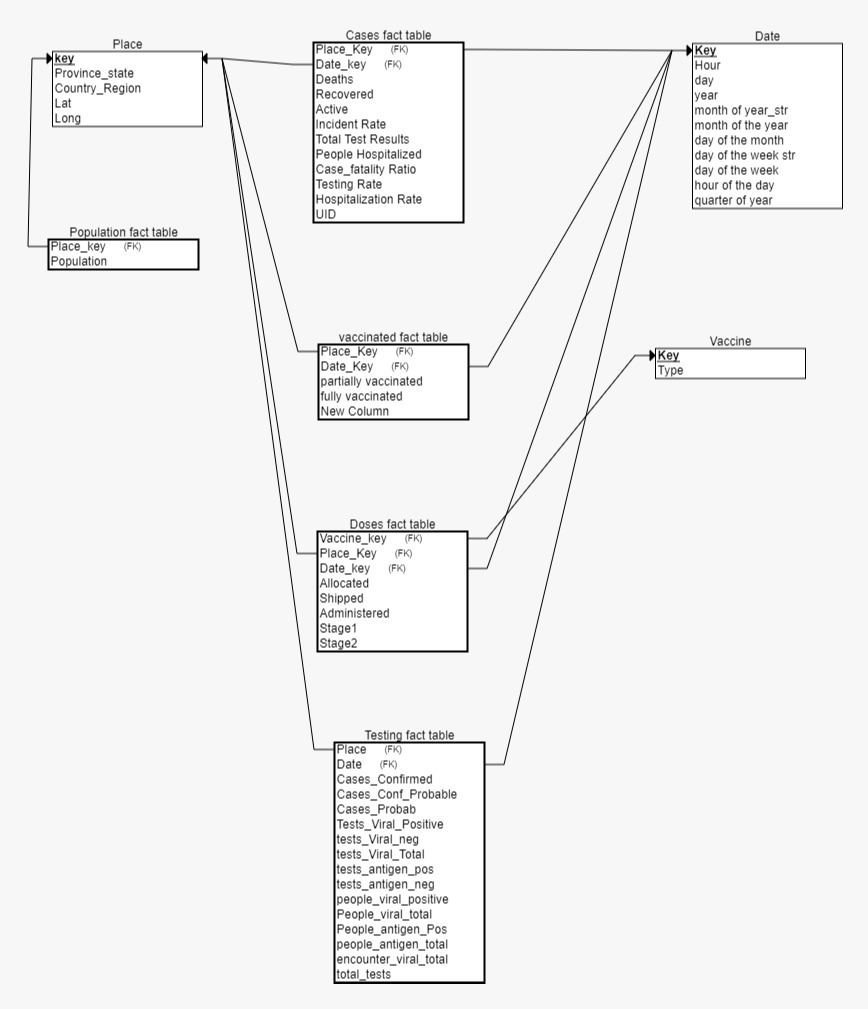

In [281]:
from IPython.display import Image
Image("StarSchema.jpeg")

# Data Analysis

## Q1. How do vaccinations affect the positivity rate by state?

create a view to get the state, day, confirmed cases, and create 2 additional columns to get the cases from the previous day in order to calculate the daily increases

then run some query to check the table/view displays expected data

In [282]:
%%sql

DROP VIEW IF EXISTS positivity_Q1 ;

CREATE VIEW positivity_Q1 AS

SELECT state_key, state, day, confirmed,
      LAG(confirmed) OVER (PARTITION BY state ORDER BY day ) AS previous_date,
      confirmed - LAG(confirmed) OVER (PARTITION BY state ORDER BY day ) AS difference_previous_date
FROM cases
JOIN place
    ON cases.state_key = place.key
JOIN date
    ON cases.date_key = date.key
ORDER BY state, day

 * postgresql://student@/week13
Done.
Done.


[]

In [283]:
%%sql

select * from positivity_Q1 limit 5


 * postgresql://student@/week13
5 rows affected.


state_key,state,day,confirmed,previous_date,difference_previous_date
35,Alabama,2020-04-12,3667.0,None,None
35,Alabama,2020-04-13,3870.0,3667.0,203.0
35,Alabama,2020-04-14,4041.0,3870.0,171.0
35,Alabama,2020-04-15,4307.0,4041.0,266.0
35,Alabama,2020-04-16,4465.0,4307.0,158.0


create a view to get the state, day, those fully vaccinated, and create 2 additional columns to get the cases from the previous day in order to calculate the daily increases

then run some query to check the table/view displays expected data

In [284]:
%%sql

DROP VIEW IF EXISTS vaccination_Q1;

CREATE VIEW vaccination_Q1 AS

SELECT state_key, state, day, fully_vaccinated, 
      LAG(fully_vaccinated) OVER (PARTITION BY state ORDER BY day ) AS previous_date,
      fully_vaccinated - LAG(fully_vaccinated) OVER (PARTITION BY state ORDER BY day ) AS difference_previous_date
FROM people_vaccinated
JOIN place
    ON people_vaccinated.state_key = place.key
JOIN date
    ON people_vaccinated.date_key = date.key
ORDER BY state, day

 * postgresql://student@/week13
Done.
Done.


[]

In [285]:
%%sql

select * from vaccination_Q1 where fully_vaccinated >800000 limit 5

 * postgresql://student@/week13
5 rows affected.


state_key,state,day,fully_vaccinated,previous_date,difference_previous_date
35,Alabama,2021-04-11,811323,788325,22998
35,Alabama,2021-04-12,819550,811323,8227
35,Alabama,2021-04-13,824052,819550,4502
35,Alabama,2021-04-14,844353,824052,20301
35,Alabama,2021-04-15,893002,844353,48649


create a table to get the daily fully vaccinated per million based on population of location

then run some query to check the table/view displays expected data

In [286]:
%%sql
DROP Table IF EXISTS vaccianted_per_mil_Q1;

CREATE Table vaccianted_per_mil_Q1 AS

SELECT v.*, p.population,round(v.difference_previous_date/(p.population/1000000), 0) as vaccinated_per_mil
FROM vaccination_Q1 v 
LEFT OUTER JOIN USpopulation p 
    ON v.state_key = p.state_key

 * postgresql://student@/week13
Done.
22212 rows affected.


[]

In [287]:
%%sql

select * from vaccianted_per_mil_Q1 where fully_vaccinated >800000 limit 5

 * postgresql://student@/week13
5 rows affected.


state_key,state,day,fully_vaccinated,previous_date,difference_previous_date,population,vaccinated_per_mil
35,Alabama,2021-04-11,811323,788325,22998,5024279,4577
35,Alabama,2021-04-12,819550,811323,8227,5024279,1637
35,Alabama,2021-04-13,824052,819550,4502,5024279,896
35,Alabama,2021-04-14,844353,824052,20301,5024279,4041
35,Alabama,2021-04-15,893002,844353,48649,5024279,9683


create a table to get the daily confirmed per million based on population of location

then run some query to check the table/view displays expected data

In [288]:
%%sql
DROP TABLE IF EXISTS positivity_per_mil_Q1;

CREATE TABLE positivity_per_mil_Q1 as

SELECT c.*, p.population, round(cast(c.difference_previous_date/(p.population/1000000) AS numeric), 0) as positivity_per_mil
FROM positivity_Q1 c 
LEFT OUTER JOIN USpopulation p
    ON c.state_key = p.state_key

 * postgresql://student@/week13
Done.
34674 rows affected.


[]

In [289]:
%%sql

select * from positivity_per_mil_Q1 where confirmed >800000 limit 5

 * postgresql://student@/week13
5 rows affected.


state_key,state,day,confirmed,previous_date,difference_previous_date,population,positivity_per_mil
35,Alabama,2021-10-04,800692.0,799800.0,892.0,5024279,178
35,Alabama,2021-10-05,801428.0,800692.0,736.0,5024279,146
35,Alabama,2021-10-06,802977.0,801428.0,1549.0,5024279,308
35,Alabama,2021-10-07,804249.0,802977.0,1272.0,5024279,253
35,Alabama,2021-10-08,805511.0,804249.0,1262.0,5024279,251


join the two tables with the data of interest into a single table for further analysis

then run some query to check the table/view displays expected data

In [290]:
%%sql
DROP TABLE IF EXISTS Q1_positive;

CREATE TABLE Q1_positive as

SELECT p.*, v.fully_vaccinated, v.previous_date as vaccinated_previous, v.difference_previous_date as vaccinated_daily, v.vaccinated_per_mil
FROM positivity_per_mil_Q1 p LEFT OUTER JOIN vaccianted_per_mil_Q1 v
ON p.state = v.state and p.day = v.day

 * postgresql://student@/week13
Done.
34674 rows affected.


[]

In [291]:
%%sql

select * from Q1_positive where vaccinated_per_mil >80000 limit 5

 * postgresql://student@/week13
3 rows affected.


state_key,state,day,confirmed,previous_date,difference_previous_date,population,positivity_per_mil,fully_vaccinated,vaccinated_previous,vaccinated_daily,vaccinated_per_mil
8,District of Columbia,2021-06-16,49213.0,49200.0,13.0,689545,19,438316,347921,90395,131094
8,District of Columbia,2021-08-04,50800.0,50718.0,82.0,689545,119,483158,387859,95299,138206
29,Rhode Island,2021-06-07,151992.0,151992.0,0.0,1097379,0,662859,564011,98848,90076


export table as csv

In [292]:
%%sql

\copy (select * from Q1_positive) to '/home/ubuntu/notebooks/Final/Q1_positive.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [293]:
%%sql

DROP TABLE IF EXISTS positivity_per_mil_Q1;
DROP TABLE IF EXISTS Q1_positive;
DROP Table IF EXISTS vaccianted_per_mil_Q1;

 * postgresql://student@/week13
Done.
Done.
Done.


[]

Just an observation to share... the number of people vaccinated in a certain state does not mean they they are actually from that state.  For example, the total number of  fully vaccinated folks in dc is around 580k.  420k are actually DC residents. 160k are residets from outside of DC.  

Check file Q1 for conclusion and visualizations

## Q2. Does higher testing capacity lead to higher positive rates?

In [294]:
# get the cumulative number of completed PCR tests per quarter, per year.
# get the cumulative number of competed PCR tests that return positive per quarter, per year.
# get the cumulative number of competed PCR tests that return negative per quarter, per year.
# five states: Utah, Florida, Missouri, Connecticut, Oregon

# get the cumulative number of completed PCR tests per month, per year.
# get the cumulative number of competed PCR tests that return positive per month, per year.
# get the cumulative number of competed PCR tests that return negative per month, per year.
# five states: Utah, Florida, Missouri, Connecticut, Oregon

In [299]:
%%sql
DROP TABLE IF EXISTS utah_qtrly_viral_tests;

CREATE TABLE utah_qtrly_viral_tests as

SELECT state, quarter_of_year, year,
    sum(tests_viral_total) total_viral_tests,
    sum(tests_viral_positive) total_positive_viral_tests,
    sum(tests_viral_negative) total_negative_viral_tests
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Utah'
GROUP BY state, quarter_of_year, year
ORDER BY state, year, quarter_of_year;

 * postgresql://student@/week13
Done.
8 rows affected.


[]

In [302]:
%%sql
select * from utah_qtrly_viral_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,quarter_of_year,year,total_viral_tests,total_positive_viral_tests,total_negative_viral_tests
Utah,1,2020,139475,7079,132396
Utah,2,2020,17376816,875206,16501610
Utah,3,2020,67166910,4712568,62454342
Utah,4,2020,150116660,15075755,135040905
Utah,1,2021,244466416,29407418,214938079


In [312]:
%%sql

\copy (select * from utah_qtrly_viral_tests) to '/home/ubuntu/notebooks/Final/tables/utah_qtrly_viral_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [304]:
%%sql
DROP TABLE IF EXISTS utah_mthly_viral_tests;

CREATE TABLE utah_mthly_viral_tests as

SELECT state, month_of_year, month_of_year_str, year,
    sum(tests_viral_total) total_viral_tests,
    sum(tests_viral_positive) total_positive_viral_tests,
    sum(tests_viral_negative) total_negative_viral_tests
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Utah'
GROUP BY state, month_of_year, month_of_year_str, year
ORDER BY state, year, month_of_year;

 * postgresql://student@/week13
Done.
22 rows affected.


[]

In [305]:
%%sql
select * from utah_mthly_viral_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,month_of_year,month_of_year_str,year,total_viral_tests,total_positive_viral_tests,total_negative_viral_tests
Utah,3,March,2020,139475,7079,132396
Utah,4,April,2020,1944286,91046,1853240
Utah,5,May,2020,5701893,250348,5451545
Utah,6,June,2020,9730637,533812,9196825
Utah,7,July,2020,16447702,1108436,15339266


In [311]:
%%sql

\copy (select * from utah_mthly_viral_tests) to '/home/ubuntu/notebooks/Final/tables/utah_mthly_viral_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [307]:
%%sql
DROP TABLE IF EXISTS florida_qtrly_viral_tests;

CREATE TABLE florida_qtrly_viral_tests as

SELECT state, quarter_of_year, year,
    sum(tests_viral_total) total_viral_tests,
    sum(tests_viral_positive) total_positive_viral_tests,
    sum(tests_viral_negative) total_negative_viral_test
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Florida'
GROUP BY state, quarter_of_year, year
ORDER BY state, year, quarter_of_year;

 * postgresql://student@/week13
Done.
8 rows affected.


[]

In [308]:
%%sql
select * from florida_qtrly_viral_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,quarter_of_year,year,total_viral_tests,total_positive_viral_tests,total_negative_viral_test
Florida,1,2020,1505090,167004,1336576
Florida,2,2020,108859087,9839836,98775823
Florida,3,2020,631185759,77311594,550179315
Florida,4,2020,1210455082,123115107,1081190518
Florida,1,2021,1967121803,200742814,1756154752


In [313]:
%%sql

\copy (select * from florida_qtrly_viral_tests) to '/home/ubuntu/notebooks/Final/tables/florida_qtrly_viral_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [310]:
%%sql
DROP TABLE IF EXISTS florida_mthly_viral_tests;

CREATE TABLE florida_mthly_viral_tests as

SELECT state, month_of_year, month_of_year_str, year,
    sum(tests_viral_total) total_viral_tests,
    sum(tests_viral_positive) total_positive_viral_tests,
    sum(tests_viral_negative) total_negative_viral_tests
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Florida'
GROUP BY state, month_of_year, month_of_year_str, year
ORDER BY state, year, month_of_year;

 * postgresql://student@/week13
Done.
24 rows affected.


[]

In [314]:
%%sql
select * from florida_mthly_viral_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,month_of_year,month_of_year_str,year,total_viral_tests,total_positive_viral_tests,total_negative_viral_tests
Florida,1,January,2020,None,None,None
Florida,2,February,2020,None,None,None
Florida,3,March,2020,1505090,167004,1336576
Florida,4,April,2020,11638246,1367903,10233313
Florida,5,May,2020,32156314,2842979,29227368


In [315]:
%%sql

\copy (select * from florida_mthly_viral_tests) to '/home/ubuntu/notebooks/Final/tables/florida_mthly_viral_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [316]:
%%sql
DROP TABLE IF EXISTS missouri_qtrly_viral_tests;

CREATE TABLE missouri_qtrly_viral_tests as

SELECT state, quarter_of_year, year,
    sum(tests_viral_total) total_viral_tests,
    sum(tests_viral_positive) total_positive_viral_tests,
    sum(tests_viral_negative) total_negative_viral_tests
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Missouri'
GROUP BY state, quarter_of_year, year
ORDER BY state, year, quarter_of_year;

 * postgresql://student@/week13
Done.
8 rows affected.


[]

In [317]:
%%sql
select * from missouri_qtrly_viral_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,quarter_of_year,year,total_viral_tests,total_positive_viral_tests,total_negative_viral_tests
Missouri,1,2020,125657,11892,113655
Missouri,2,2020,14665391,1114623,13640621
Missouri,3,2020,100579255,6996407,93410040
Missouri,4,2020,256921642,25568443,230856854
Missouri,1,2021,387521908,45929025,340798488


In [318]:
%%sql

\copy (select * from missouri_qtrly_viral_tests) to '/home/ubuntu/notebooks/Final/tables/missouri_qtrly_viral_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [320]:
%%sql
DROP TABLE IF EXISTS missouri_mthly_viral_tests;

CREATE TABLE missouri_mthly_viral_tests as

SELECT state, month_of_year, month_of_year_str, year,
    sum(tests_viral_total) total_viral_tests,
    sum(tests_viral_positive) total_positive_viral_tests,
    sum(tests_viral_negative) total_negative_viral_tests
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Missouri'
GROUP BY state, month_of_year, month_of_year_str, year
ORDER BY state, year, month_of_year;

 * postgresql://student@/week13
Done.
22 rows affected.


[]

In [321]:
%%sql
select * from missouri_mthly_viral_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,month_of_year,month_of_year_str,year,total_viral_tests,total_positive_viral_tests,total_negative_viral_tests
Missouri,3,March,2020,125657,11892,113655
Missouri,4,April,2020,1516463,172098,1342488
Missouri,5,May,2020,4407666,391331,4011569
Missouri,6,June,2020,8741262,551194,8286564
Missouri,7,July,2020,20400232,1138822,19228314


In [322]:
%%sql

\copy (select * from missouri_mthly_viral_tests) to '/home/ubuntu/notebooks/Final/tables/missouri_mthly_viral_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [323]:
%%sql
DROP TABLE IF EXISTS connecticut_qtrly_viral_tests;

CREATE TABLE connecticut_qtrly_viral_tests as

SELECT state, quarter_of_year, year,
    sum(tests_viral_total) total_viral_tests,
    sum(tests_viral_positive) total_positive_viral_tests,
    sum(tests_viral_negative) total_negative_viral_tests
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Connecticut'
GROUP BY state, quarter_of_year, year
ORDER BY state, year, quarter_of_year;

 * postgresql://student@/week13
Done.
8 rows affected.


[]

In [324]:
%%sql
select * from connecticut_qtrly_viral_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,quarter_of_year,year,total_viral_tests,total_positive_viral_tests,total_negative_viral_tests
Connecticut,1,2020,175810,41519,134182
Connecticut,2,2020,19120222,3635145,15419021
Connecticut,3,2020,100335337,5832399,94322045
Connecticut,4,2020,289525319,11763982,277375833
Connecticut,1,2021,534244483,26981797,506558388


In [325]:
%%sql

\copy (select * from connecticut_qtrly_viral_tests) to '/home/ubuntu/notebooks/Final/tables/connecticut_qtrly_viral_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [326]:
%%sql
DROP TABLE IF EXISTS connecticut_mthly_viral_tests;

CREATE TABLE connecticut_mthly_viral_tests as

SELECT state, month_of_year, month_of_year_str, year,
    sum(tests_viral_total) total_viral_tests,
    sum(tests_viral_positive) total_positive_viral_tests,
    sum(tests_viral_negative) total_negative_viral_tests
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Connecticut'
GROUP BY state, month_of_year, month_of_year_str, year
ORDER BY state, year, month_of_year;

 * postgresql://student@/week13
Done.
23 rows affected.


[]

In [327]:
%%sql
select * from connecticut_mthly_viral_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,month_of_year,month_of_year_str,year,total_viral_tests,total_positive_viral_tests,total_negative_viral_tests
Connecticut,2,February,2020,3,0,3
Connecticut,3,March,2020,175807,41519,134179
Connecticut,4,April,2020,1864486,616722,1244978
Connecticut,5,May,2020,5767819,1362153,4381750
Connecticut,6,June,2020,11487917,1656270,9792293


In [328]:
%%sql

\copy (select * from connecticut_mthly_viral_tests) to '/home/ubuntu/notebooks/Final/tables/connecticut_mthly_viral_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [329]:
%%sql
DROP TABLE IF EXISTS oregon_qtrly_viral_tests;

CREATE TABLE oregon_qtrly_viral_tests as

SELECT state, quarter_of_year, year,
    sum(tests_viral_total) total_viral_tests,
    sum(tests_viral_positive) total_positive_viral_tests,
    sum(tests_viral_negative) total_negative_viral_tests
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Oregon'
GROUP BY state, quarter_of_year, year
ORDER BY state, year, quarter_of_year;

 * postgresql://student@/week13
Done.
8 rows affected.


[]

In [330]:
%%sql
select * from oregon_qtrly_viral_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,quarter_of_year,year,total_viral_tests,total_positive_viral_tests,total_negative_viral_tests
Oregon,1,2020,3878,2994,884
Oregon,2,2020,12764396,859335,11905061
Oregon,3,2020,67175803,3648168,63527635
Oregon,4,2020,161733800,8711558,153022242
Oregon,1,2021,307810991,18023557,289707925


In [331]:
%%sql

\copy (select * from oregon_qtrly_viral_tests) to '/home/ubuntu/notebooks/Final/tables/oregon_qtrly_viral_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [332]:
%%sql
DROP TABLE IF EXISTS oregon_mthly_viral_tests;

CREATE TABLE oregon_mthly_viral_tests as

SELECT state, month_of_year, month_of_year_str, year,
    sum(tests_viral_total) total_viral_tests,
    sum(tests_viral_positive) total_positive_viral_tests,
    sum(tests_viral_negative) total_negative_viral_tests
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Oregon'
GROUP BY state, month_of_year, month_of_year_str, year
ORDER BY state, year, month_of_year;

 * postgresql://student@/week13
Done.
22 rows affected.


[]

In [333]:
%%sql
select * from oregon_mthly_viral_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,month_of_year,month_of_year_str,year,total_viral_tests,total_positive_viral_tests,total_negative_viral_tests
Oregon,3,March,2020,3878,2994,884
Oregon,4,April,2020,1007468,135890,871578
Oregon,5,May,2020,3835945,289975,3545970
Oregon,6,June,2020,7920983,433470,7487513
Oregon,7,July,2020,15286064,779236,14506828


In [335]:
%%sql

\copy (select * from oregon_mthly_viral_tests) to '/home/ubuntu/notebooks/Final/tables/oregon_mthly_viral_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [336]:
# get the cumulative number of completed antigen tests per quarter, per year.
# get the cumulative number of competed antigen tests that return positive per quarter, per year.
# five states: Iowa, Texas, Virginia, Maine, Georgia

# get the cumulative number of completed antigen tests per month, per year.
# get the cumulative number of competed antigen tests that return positive per month, per year.
# five states: Iowa, Texas, Virginia, Maine, Georgia

In [337]:
%%sql
DROP TABLE IF EXISTS iowa_qtrly_antigen_tests;

CREATE TABLE iowa_qtrly_antigen_tests as

SELECT state, quarter_of_year, year,
    sum(tests_antigen_total) total_antigen_tests,
    sum(tests_antigen_positive) total_positive_antigen_tests
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Iowa'
GROUP BY state, quarter_of_year, year
ORDER BY state, year, quarter_of_year;

 * postgresql://student@/week13
Done.
8 rows affected.


[]

In [338]:
%%sql
select * from iowa_qtrly_antigen_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,quarter_of_year,year,total_antigen_tests,total_positive_antigen_tests
Iowa,1,2020,None,None
Iowa,2,2020,None,None
Iowa,3,2020,None,None
Iowa,4,2020,18418941,977076
Iowa,1,2021,108762533,5059630


In [340]:
%%sql

\copy (select * from iowa_qtrly_antigen_tests) to '/home/ubuntu/notebooks/Final/tables2/iowa_qtrly_antigen_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [341]:
%%sql
DROP TABLE IF EXISTS iowa_mthly_antigen_tests;

CREATE TABLE iowa_mthly_antigen_tests as

SELECT state, month_of_year, month_of_year_str, year,
    sum(tests_antigen_total) total_antigen_tests,
    sum(tests_antigen_positive) total_positive_antigen_tests
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Iowa'
GROUP BY state, month_of_year, month_of_year_str, year
ORDER BY state, year, month_of_year;

 * postgresql://student@/week13
Done.
22 rows affected.


[]

In [342]:
%%sql
select * from iowa_mthly_antigen_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,month_of_year,month_of_year_str,year,total_antigen_tests,total_positive_antigen_tests
Iowa,3,March,2020,None,None
Iowa,4,April,2020,None,None
Iowa,5,May,2020,None,None
Iowa,6,June,2020,None,None
Iowa,7,July,2020,None,None


In [343]:
%%sql

\copy (select * from iowa_mthly_antigen_tests) to '/home/ubuntu/notebooks/Final/tables2/iowa_mthly_antigen_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [344]:
%%sql
DROP TABLE IF EXISTS texas_qtrly_antigen_tests;

CREATE TABLE texas_qtrly_antigen_tests as

SELECT state, quarter_of_year, year,
    sum(tests_antigen_total) total_antigen_tests,
    sum(tests_antigen_positive) total_positive_antigen_tests
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Texas'
GROUP BY state, quarter_of_year, year
ORDER BY state, year, quarter_of_year;

 * postgresql://student@/week13
Done.
8 rows affected.


[]

In [345]:
%%sql
select * from texas_qtrly_antigen_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,quarter_of_year,year,total_antigen_tests,total_positive_antigen_tests
Texas,1,2020,None,None
Texas,2,2020,102330,17752
Texas,3,2020,7903477,986925
Texas,4,2020,55721104,4579349
Texas,1,2021,188091070,15871704


In [346]:
%%sql

\copy (select * from texas_qtrly_antigen_tests) to '/home/ubuntu/notebooks/Final/tables2/texas_qtrly_antigen_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [347]:
%%sql
DROP TABLE IF EXISTS texas_mthly_antigen_tests;

CREATE TABLE texas_mthly_antigen_tests as

SELECT state, month_of_year, month_of_year_str, year,
    sum(tests_antigen_total) total_antigen_tests,
    sum(tests_antigen_positive) total_positive_antigen_tests
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Texas'
GROUP BY state, month_of_year, month_of_year_str, year
ORDER BY state, year, month_of_year;

 * postgresql://student@/week13
Done.
22 rows affected.


[]

In [348]:
%%sql
select * from texas_mthly_antigen_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,month_of_year,month_of_year_str,year,total_antigen_tests,total_positive_antigen_tests
Texas,3,March,2020,None,None
Texas,4,April,2020,None,None
Texas,5,May,2020,617,34
Texas,6,June,2020,101713,17718
Texas,7,July,2020,982473,187287


In [349]:
%%sql

\copy (select * from texas_mthly_antigen_tests) to '/home/ubuntu/notebooks/Final/tables2/texas_mthly_antigen_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [350]:
%%sql
DROP TABLE IF EXISTS virginia_qtrly_antigen_tests;

CREATE TABLE virginia_qtrly_antigen_tests as

SELECT state, quarter_of_year, year,
    sum(tests_antigen_total) total_antigen_tests,
    sum(tests_antigen_positive) total_positive_antigen_tests
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Virginia'
GROUP BY state, quarter_of_year, year
ORDER BY state, year, quarter_of_year;

 * postgresql://student@/week13
Done.
8 rows affected.


[]

In [351]:
%%sql
select * from virginia_qtrly_antigen_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,quarter_of_year,year,total_antigen_tests,total_positive_antigen_tests
Virginia,1,2020,768,34
Virginia,2,2020,9024,3538
Virginia,3,2020,636621,121583
Virginia,4,2020,25946142,1818811
Virginia,1,2021,105905006,9555662


In [352]:
%%sql

\copy (select * from virginia_qtrly_antigen_tests) to '/home/ubuntu/notebooks/Final/tables2/virginia_qtrly_antigen_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [353]:
%%sql
DROP TABLE IF EXISTS virginia_mthly_antigen_tests;

CREATE TABLE virginia_mthly_antigen_tests as

SELECT state, month_of_year, month_of_year_str, year,
    sum(tests_antigen_total) total_antigen_tests,
    sum(tests_antigen_positive) total_positive_antigen_tests
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Virginia'
GROUP BY state, month_of_year, month_of_year_str, year
ORDER BY state, year, month_of_year;

 * postgresql://student@/week13
Done.
24 rows affected.


[]

In [354]:
%%sql
select * from virginia_mthly_antigen_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,month_of_year,month_of_year_str,year,total_antigen_tests,total_positive_antigen_tests
Virginia,1,January,2020,8,0
Virginia,2,February,2020,200,1
Virginia,3,March,2020,560,33
Virginia,4,April,2020,708,164
Virginia,5,May,2020,2875,773


In [355]:
%%sql

\copy (select * from virginia_mthly_antigen_tests) to '/home/ubuntu/notebooks/Final/tables2/virginia_mthly_antigen_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [356]:
%%sql
DROP TABLE IF EXISTS maine_qtrly_antigen_tests;

CREATE TABLE maine_qtrly_antigen_tests as

SELECT state, quarter_of_year, year,
    sum(tests_antigen_total) total_antigen_tests,
    sum(tests_antigen_positive) total_positive_antigen_tests
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Maine'
GROUP BY state, quarter_of_year, year
ORDER BY state, year, quarter_of_year;

 * postgresql://student@/week13
Done.
8 rows affected.


[]

In [357]:
%%sql
select * from maine_qtrly_antigen_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,quarter_of_year,year,total_antigen_tests,total_positive_antigen_tests
Maine,1,2020,None,None
Maine,2,2020,None,None
Maine,3,2020,None,None
Maine,4,2020,1643801,69384
Maine,1,2021,15013107,781164


In [358]:
%%sql

\copy (select * from maine_qtrly_antigen_tests) to '/home/ubuntu/notebooks/Final/tables2/maine_qtrly_antigen_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [359]:
%%sql
DROP TABLE IF EXISTS maine_mthly_antigen_tests;

CREATE TABLE maine_mthly_antigen_tests as

SELECT state, month_of_year, month_of_year_str, year,
    sum(tests_antigen_total) total_antigen_tests,
    sum(tests_antigen_positive) total_positive_antigen_tests
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Maine'
GROUP BY state, month_of_year, month_of_year_str, year
ORDER BY state, year, month_of_year;

 * postgresql://student@/week13
Done.
22 rows affected.


[]

In [360]:
%%sql
select * from maine_mthly_antigen_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,month_of_year,month_of_year_str,year,total_antigen_tests,total_positive_antigen_tests
Maine,3,March,2020,None,None
Maine,4,April,2020,None,None
Maine,5,May,2020,None,None
Maine,6,June,2020,None,None
Maine,7,July,2020,None,None


In [361]:
%%sql

\copy (select * from maine_mthly_antigen_tests) to '/home/ubuntu/notebooks/Final/tables2/maine_mthly_antigen_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [362]:
%%sql
DROP TABLE IF EXISTS georgia_qtrly_antigen_tests;

CREATE TABLE georgia_qtrly_antigen_tests as

SELECT state, quarter_of_year, year,
    sum(tests_antigen_total) total_antigen_tests,
    sum(tests_antigen_positive) total_positive_antigen_tests
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Georgia'
GROUP BY state, quarter_of_year, year
ORDER BY state, year, quarter_of_year;

 * postgresql://student@/week13
Done.
8 rows affected.


[]

In [363]:
%%sql
select * from georgia_qtrly_antigen_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,quarter_of_year,year,total_antigen_tests,total_positive_antigen_tests
Georgia,1,2020,None,None
Georgia,2,2020,None,None
Georgia,3,2020,None,None
Georgia,4,2020,None,None
Georgia,1,2021,60518148,6939800


In [364]:
%%sql

\copy (select * from georgia_qtrly_antigen_tests) to '/home/ubuntu/notebooks/Final/tables2/georgia_qtrly_antigen_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

In [365]:
%%sql
DROP TABLE IF EXISTS georgia_mthly_antigen_tests;

CREATE TABLE georgia_mthly_antigen_tests as

SELECT state, month_of_year, month_of_year_str, year,
    sum(tests_antigen_total) total_antigen_tests,
    sum(tests_antigen_positive) total_positive_antigen_tests
FROM tests
JOIN place
    ON tests.state_key = place.key
JOIN date
    ON tests.date_key = date.key
WHERE state = 'Georgia'
GROUP BY state, month_of_year, month_of_year_str, year
ORDER BY state, year, month_of_year;

 * postgresql://student@/week13
Done.
22 rows affected.


[]

In [366]:
%%sql
select * from georgia_mthly_antigen_tests limit 5

 * postgresql://student@/week13
5 rows affected.


state,month_of_year,month_of_year_str,year,total_antigen_tests,total_positive_antigen_tests
Georgia,3,March,2020,None,None
Georgia,4,April,2020,None,None
Georgia,5,May,2020,None,None
Georgia,6,June,2020,None,None
Georgia,7,July,2020,None,None


In [367]:
%%sql

\copy (select * from georgia_mthly_antigen_tests) to '/home/ubuntu/notebooks/Final/tables2/georgia_mthly_antigen_tests.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

Check file Q2 for conclusion and visualizations

## Q3. What test types are more popular based on state?

In [368]:
%%sql
SELECT state,
    sum(tests_antigen_total) total_antigen_tests,
    sum(tests_antigen_positive) total_positive_antigen_tests,
    sum(tests_viral_total) total_viral_tests,
    sum(tests_viral_positive) total_positive_viral_tests,
    sum(tests_antigen_total+tests_viral_total) total_tests,
    sum(tests_antigen_total)*100/sum(tests_antigen_total+tests_viral_total) as percent_antigen_tests,
    sum(tests_viral_total)*100/sum(tests_antigen_total+tests_viral_total) as percent_viral_tests
    
FROM tests
JOIN place
    ON tests.state_key = place.key
where tests_antigen_total is not null
and tests_antigen_positive is not null
and tests_viral_total is not null
and tests_viral_positive is not null

GROUP BY state
ORDER BY total_tests

 * postgresql://student@/week13
12 rows affected.


state,total_antigen_tests,total_positive_antigen_tests,total_viral_tests,total_positive_viral_tests,total_tests,percent_antigen_tests,percent_viral_tests
Maine,134128624,7228596,819676528,19764442,953805152,14,85
Puerto Rico,460169676,13787401,942334929,78387655,1402504605,32,67
Iowa,646915920,26461993,1191249531,125080166,1838165451,35,64
Utah,530147228,30851631,1445445166,154065784,1975592394,26,73
Kentucky,353661256,41061918,1891919249,142563493,2245580505,15,84
Missouri,631123533,42820371,2248929702,238473378,2880053235,21,78
South Carolina,507352307,54010971,2514708089,262830336,3022060396,16,83
Connecticut,239880549,12066054,3093703638,138667873,3333584187,7,92
Georgia,746195477,71582776,2888531862,294173822,3634727339,20,79
Tennessee,790168088,69338504,3154934772,333058230,3945102860,20,79


In [369]:
%%sql
SELECT state,
    sum(tests_antigen_total) total_antigen_tests,
    sum(tests_antigen_positive) total_positive_antigen_tests,
    sum(tests_viral_total) total_viral_tests,
    sum(tests_viral_positive) total_positive_viral_tests,
    round(sum(tests_antigen_positive)*100/sum(tests_antigen_total)) as percent_antigen_positive,
    round(sum(tests_viral_positive)*100/sum(tests_viral_total)) as percent_viral_positive
    
FROM tests
JOIN place
    ON tests.state_key = place.key
where tests_antigen_total is not null
and tests_antigen_positive is not null
and tests_viral_total is not null
and tests_viral_positive is not null

GROUP BY state
ORDER BY state

 * postgresql://student@/week13
12 rows affected.


state,total_antigen_tests,total_positive_antigen_tests,total_viral_tests,total_positive_viral_tests,percent_antigen_positive,percent_viral_positive
Connecticut,239880549,12066054,3093703638,138667873,5.0,4.0
Georgia,746195477,71582776,2888531862,294173822,9.0,10.0
Iowa,646915920,26461993,1191249531,125080166,4.0,10.0
Kentucky,353661256,41061918,1891919249,142563493,11.0,7.0
Maine,134128624,7228596,819676528,19764442,5.0,2.0
Missouri,631123533,42820371,2248929702,238473378,6.0,10.0
Ohio,1100742596,50200850,5007308979,381093051,4.0,7.0
Puerto Rico,460169676,13787401,942334929,78387655,2.0,8.0
South Carolina,507352307,54010971,2514708089,262830336,10.0,10.0
Tennessee,790168088,69338504,3154934772,333058230,8.0,10.0


## Q4. Does the distribution of doses shipped differ among states?

### Get the daily distribution of doses alloc, admin, shipped across states

In [370]:
%%sql
DROP VIEW if exists distribution;

CREATE VIEW distribution AS

SELECT state_key, state, day, v_type_key, 
      doses_alloc - LAG(doses_alloc) OVER (PARTITION BY state ORDER BY day) AS daily_alloc,
      doses_admin - LAG(doses_admin) OVER (PARTITION BY state ORDER BY day) AS daily_admin,
      doses_shipped - LAG(doses_shipped) OVER (PARTITION BY state ORDER BY day) AS daily_shipped
        
FROM vaccine
JOIN place
    ON vaccine.state_key = place.key
JOIN date
    ON vaccine.date_key = date.key
    
WHERE v_type_key = 2
ORDER BY state, day

 * postgresql://student@/week13
Done.
Done.


[]

In [371]:
%%sql

select * from distribution
WHERE day between '2021-04-01' and '2021-06-30' 
and state Like 'Maryland'
limit 5

 * postgresql://student@/week13
5 rows affected.


state_key,state,day,v_type_key,daily_alloc,daily_admin,daily_shipped
62,Maryland,2021-04-01,2,None,5051,None
62,Maryland,2021-04-02,2,None,5038,None
62,Maryland,2021-04-03,2,None,5280,None
62,Maryland,2021-04-04,2,None,4483,None
62,Maryland,2021-04-05,2,None,1073,None


### Join population info and calculate shipped doses per million ppl

In [372]:
%%sql
DROP TABLE IF EXISTS distribution_per_mil;

CREATE TABLE distribution_per_mil as

SELECT d.*, p.population, round(d.daily_shipped/(p.population/1000000),2) as doses_per_mil
FROM distribution d 
LEFT OUTER JOIN USpopulation p
    ON d.state_key = p.state_key

 * postgresql://student@/week13
Done.
17025 rows affected.


[]

In [373]:
%%sql

select * from distribution_per_mil
WHERE day between '2021-04-01' and '2021-06-30' 
and state Like 'Maryland'
limit 5

 * postgresql://student@/week13
5 rows affected.


state_key,state,day,v_type_key,daily_alloc,daily_admin,daily_shipped,population,doses_per_mil
62,Maryland,2021-04-01,2,None,5051,None,6177224,None
62,Maryland,2021-04-02,2,None,5038,None,6177224,None
62,Maryland,2021-04-03,2,None,5280,None,6177224,None
62,Maryland,2021-04-04,2,None,4483,None,6177224,None
62,Maryland,2021-04-05,2,None,1073,None,6177224,None


### Export data

In [374]:
%%sql

\copy (select * from distribution_per_mil) to '/home/ubuntu/notebooks/Final/distribution_per_mil.csv' with (format csv, header)

 * postgresql://student@/week13
0 rows affected.


[]

### Drop tables

In [375]:
%%sql

DROP TABLE IF EXISTS distribution_per_mil;

 * postgresql://student@/week13
Done.


[]

Check Q4.ipynb for conclusion and visualization